
Loan Eligibility Prediction Classification Project 




The dataset has already been uploaded into the notebook

In [25]:
import pandas as pd
import numpy as np
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [26]:
df0 = pd.read_csv('/content/sample_data/loan_data_set.csv')
df = df0.dropna()

In [27]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [28]:
df.shape

(480, 13)

In [29]:
df.drop(['Married', 'Gender', 'Property_Area', 'CoapplicantIncome', 'Education'], axis = 1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [30]:
df['Loan_Status'].value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

Let's vizualise the data to see how helpful the parameter are for the prediction

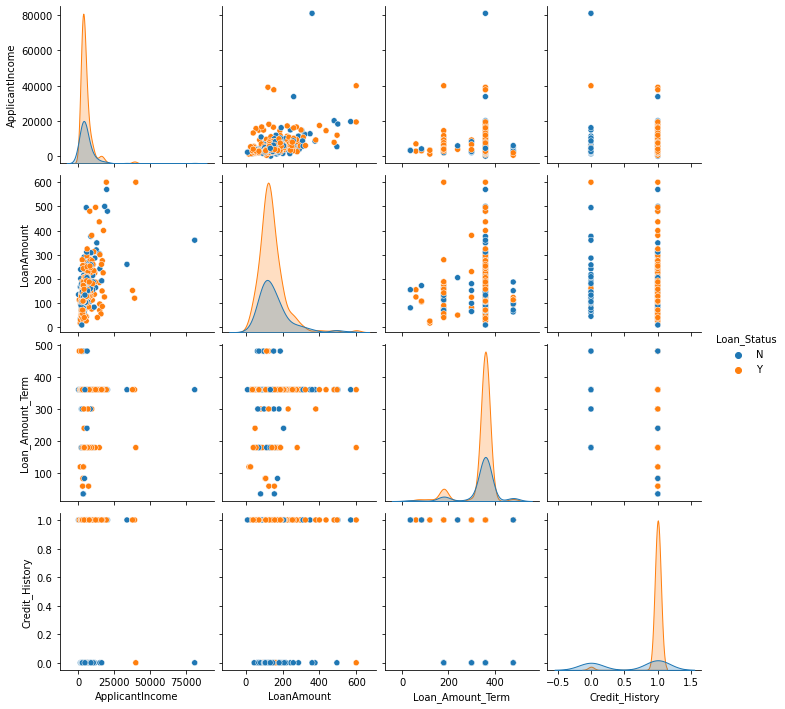

In [31]:
sns.pairplot(df, hue='Loan_Status')

Looks like the best feature for classification is credit history

In [32]:
Feature = df[['Credit_History']]

In [33]:
X = Feature

In [34]:
y = df['Loan_Status'].values
y[0:5]

array(['N', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [35]:
X= preprocessing.StandardScaler().fit(X).transform(X)

In [36]:
X[0:5]

array([[0.41319694],
       [0.41319694],
       [0.41319694],
       [0.41319694],
       [0.41319694]])

We need to split our data for training and testing

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Now we define and train the model

In [38]:
supportVectMac = svm.SVC(kernel='rbf')

In [39]:
supportVectMac.fit(X_train, y_train)

SVC()

Let's see how good our model classify the data

In [40]:
supportVectMac.score(X_test, y_test)

0.8333333333333334

It does well but let's check if adding more features can improve the performance

In [41]:
Features = df[['Credit_History', 'LoanAmount', 'ApplicantIncome']]

In [42]:
X = Features

In [43]:
X= preprocessing.StandardScaler().fit(X).transform(X)

In [44]:
X[0:5]

array([[ 0.41319694, -0.20808917, -0.13796959],
       [ 0.41319694, -0.97900085, -0.4175358 ],
       [ 0.41319694, -0.30756164, -0.49118022],
       [ 0.41319694, -0.04644639,  0.11228014],
       [ 0.41319694,  1.52024509,  0.00931924]])

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [46]:
SVM = svm.SVC(kernel='rbf')

In [47]:
SVM.fit(X_train, y_train)

SVC()

In [48]:
SVM.score(X_test, y_test)

0.7666666666666667

As we can see, increasing the number of features does not make the model more accurate. Thus, we are sure that Credit History is the best feature to use